In [1]:
import numpy as np
import pandas as pd
from numpy import log2 as log

In [2]:
dataset = [
    ['<21', 'High', 'Male', 'Single', 'No'],
    ['<21', 'High', 'Male', 'Married', 'No'],
    ['21-35', 'High', 'Male', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Married', 'No'],
    ['21-35', 'Low', 'Female', 'Married', 'Yes'],
    ['<21', 'Medium', 'Male', 'Single', 'No'],
    ['<21', 'Low', 'Female', 'Married', 'Yes'],
    ['>35', 'Medium', 'Female', 'Single', 'Yes'],
    ['<21', 'Medium', 'Female', 'Married', 'Yes'],
    ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
    ['21-35', 'High', 'Female', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Married', 'No']
]

In [3]:
columns = ['Age', 'Income', 'Gender', 'Marital Status', 'Buys']
df = pd.DataFrame(dataset,columns=columns)
df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(5):
    df[columns[i]] = le.fit_transform(df[columns[i]])
df

,Age,Income,Gender,Marital Status,Buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [5]:
test_data=[[1, 1, 0, 0]]
test = pd.DataFrame(test_data,columns=['Age', 'Income', 'Gender', 'Marital Status'])
test

,Age,Income,Gender,Marital Status
0,1,1,0,0


In [6]:
eps = np.finfo(float).eps

![title](ent1.png)

In [7]:
# Calculate the Cost Function that is Entropy
def find_entropy(df):
    Class = df.keys()[-1]
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
        print("Class: ", Class, " E(S): ", entropy)
    return entropy

![title](ent2.png)

In [8]:
#Find entropy of the attribute (Each Columns)
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]
    target_variables = df[Class].unique()
    variables = df[attribute].unique()
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class]==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
        print("Class: ", Class, " E(T,X): ", entropy2)
    return abs(entropy2)

![title](infg.png)

In [9]:
#Find Root Node
def find_winner(df):
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
        print(np.argmax(IG))
    return df.keys()[:-1][np.argmax(IG)]

In [10]:
def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)

In [11]:
def buildTree(df,tree=None): 
    Class = df.keys()[-1]
    #Build Decision Tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    print("node with max info gain: ",node)
    
    #Get distinct value of that attribute
    attValue = np.unique(df[node])
    print("distinct values found: ", attValue)
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
    #Check if the subset is pure and stops if it is. 
    for value in attValue:
        subtable = get_subtable(df,node,value)
        print("subtable: ", subtable)
        clValue,counts = np.unique(subtable['Buys'],return_counts=True) 
        print("clValue: ", clValue)
        print("counts: ", counts)
        
        if(len(counts)==1): #Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [12]:
dtree = buildTree(df)
dtree

Class:  Buys  E(S):  0.5305095811322292
Class:  Buys  E(S):  0.9402859586706311
Class:  Buys  E(T,X):  -0.34676806944809574
Class:  Buys  E(T,X):  -0.34676806944809563
Class:  Buys  E(T,X):  -0.6935361388961914
0
Class:  Buys  E(S):  0.5305095811322292
Class:  Buys  E(S):  0.9402859586706311
Class:  Buys  E(T,X):  -0.28571428571428553
Class:  Buys  E(T,X):  -0.6792696431662093
Class:  Buys  E(T,X):  -0.9110633930116756
0
Class:  Buys  E(S):  0.5305095811322292
Class:  Buys  E(S):  0.9402859586706311
Class:  Buys  E(T,X):  -0.49261406801712543
Class:  Buys  E(T,X):  -0.7884504573082889
0
Class:  Buys  E(S):  0.5305095811322292
Class:  Buys  E(S):  0.9402859586706311
Class:  Buys  E(T,X):  -0.43156028428331517
Class:  Buys  E(T,X):  -0.9241743523004406
0
node with max info gain:  Age
distinct values found:  [0 1 2]
subtable:     Age  Income  Gender  Marital Status  Buys
0    0       0       1               1     1
1    0       1       0               0     1
2    0       2       1       

{'Age': {0: 1,
  1: {'Gender': {0: 1, 1: 0}},
  2: {'Marital Status': {0: 0, 1: 1}}}}

In [13]:
def predict(inst,tree):    
    #Recursively we going through the tree that built earlier
    for nodes in tree.keys():        
        value = inst[nodes]
        tree = tree[nodes][value]
        prediction = 0
            
        if type(tree) is dict:
            prediction = predict(inst, tree)
        else:
            prediction = tree
            break;                            
        
    return prediction

In [14]:
tester = test.iloc[0]
Prediction = predict(tester,dtree)

In [15]:
Prediction

1

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
sklearn_dtree=DecisionTreeClassifier(criterion="entropy")

In [17]:
df1 = df.copy()
df1.drop('Buys', axis=1, inplace=True)
X=df1

In [18]:
sklearn_dtree.fit(X, df['Buys'])
sklearn_dtree.predict(test)

array([1])

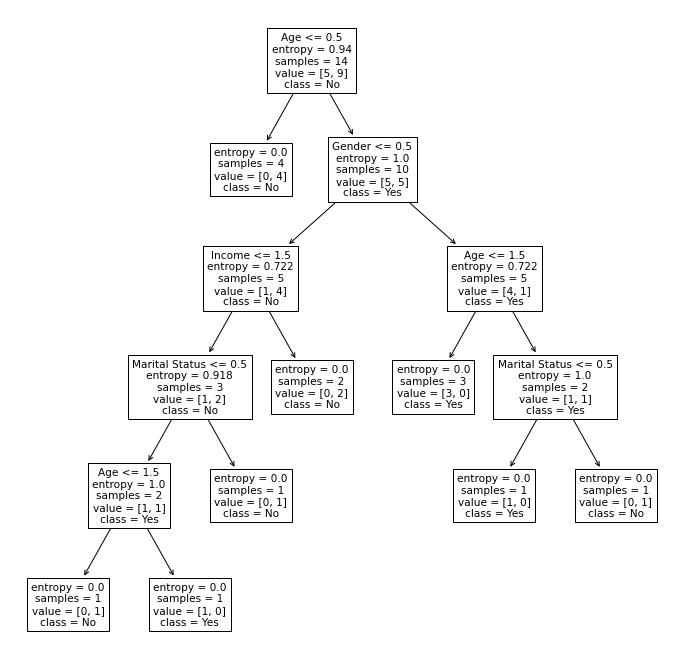

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
dec_tree = plot_tree(decision_tree=sklearn_dtree, feature_names = df.columns, class_names =["Yes", "No"])
plt.show()

In [20]:
dtree

{'Age': {0: 1,
  1: {'Gender': {0: 1, 1: 0}},
  2: {'Marital Status': {0: 0, 1: 1}}}}